

# **Import neccesary Libraries**



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Add, GlobalAveragePooling2D, Lambda,	Input, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import schedules, SGD
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.models import load_model
import seaborn as sns

 # **a) CNN model from scratch on Fashion Mnist Dataset**

# **Load and view the data**

In [ ]:
# Load the Fashion MNIST dataset
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = fashion_mnist.load_data()

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


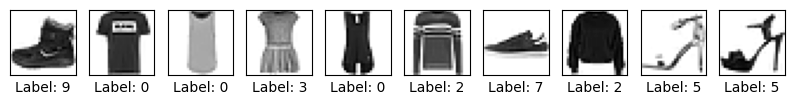

Labels of the first 10 training images: [9 0 0 3 0 2 7 2 5 5]


In [ ]:
# Print the shapes of the datasets
print("Shape of train_images:", x_train_images.shape)
print("Shape of train_labels:", y_train_labels.shape)
print("Shape of test_images:", x_test_images.shape)
print("Shape of test_labels:", y_test_labels.shape)

# Display a few images from the training set and print their labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_images[i],cmap=plt.cm.binary)
    plt.xlabel(f"Label: {y_train_labels[i]}")
plt.show()

# Print the labels of the first 5 images
print("Labels of the first 10 training images:", y_train_labels[:10])

# **Preprocessing**

# **Normalization**

In [ ]:

print("Before:")
#  check the minimum and maximum values of the data to ensure they are within the expected range [0, 255]
print("Training set - Min:", x_train_images.min(), "Max:", x_train_images.max())
print("Test set - Min:", x_test_images.min(), "Max:", x_test_images.max())

# Preprocess the data by reshaping and normalizing
train_images = x_train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = x_test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


print("After:")
#  check the minimum and maximum values of the normalized data to ensure they are within the expected range [0, 1]
print("Normalized training set - Min:", train_images.min(), "Max:", train_images.max())
print("Normalized test set - Min:", test_images.min(), "Max:", test_images.max())
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)

Before:
Training set - Min: 0 Max: 255
Test set - Min: 0 Max: 255
After:
Normalized training set - Min: 0.0 Max: 1.0
Normalized test set - Min: 0.0 Max: 1.0
Shape of train_images: (60000, 28, 28, 1)
Shape of test_images: (10000, 28, 28, 1)


# **One-Hot Encoding**

In [ ]:

print("Before:")
print("First training label:", y_train_labels[0])  # Print the label of the first training image
print("Seventh test label:", y_test_labels[7]) # Print the label of the seventh test image

# Convert labels to one-hot encoding
train_labels = to_categorical(y_train_labels)
test_labels = to_categorical(y_test_labels)

print("First training label (one-hot):", train_labels[0])  # Print the one-hot encoded label of the first training image
print("Seventh test label (one-hot):", test_labels[7])  # Print the one-hot encoded label of the seventh test image




Before:
First training label: 9
Seventh test label: 6
First training label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Seventh test label (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# **Model Building - CNN**

In [ ]:
# Define the CNN model
cnn_model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth convolutional layer
    Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # First fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Second fully connected layer
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])

cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_30 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_31 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                      

# **Compile the model**

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Train the model**

In [ ]:
batch_size = 32
epochs = 10
# Train the model
history = cnn_model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 143s 95ms/step - loss: 0.4435 - accuracy: 0.8475 - val_loss: 0.3299 - val_accuracy: 0.8808
Epoch 2/10
1500/1500 [==============================] - 142s 94ms/step - loss: 0.3234 - accuracy: 0.8888 - val_loss: 0.3988 - val_accuracy: 0.8643
Epoch 3/10
1500/1500 [==============================] - 144s 96ms/step - loss: 0.2831 - accuracy: 0.9033 - val_loss: 0.2849 - val_accuracy: 0.8985
Epoch 4/10
1500/1500 [==============================] - 141s 94ms/step - loss: 0.2559 - accuracy: 0.9106 - val_loss: 0.2691 - val_accuracy: 0.9003
Epoch 5/10
1500/1500 [==============================] - 140s 93ms/step - loss: 0.2309 - accuracy: 0.9195 - val_loss: 0.2627 - val_accuracy: 0.9097
Epoch 6/10
1500/1500 [==============================] - 143s 96ms/step - loss: 0.2133 - accuracy: 0.9260 - val_loss: 0.3148 - val_accuracy: 0.8947
Epoch 7/10
1500/1500 [==============================] - 142s 95ms/step - loss: 0.1978 - accuracy: 0.9311 - val_loss: 0

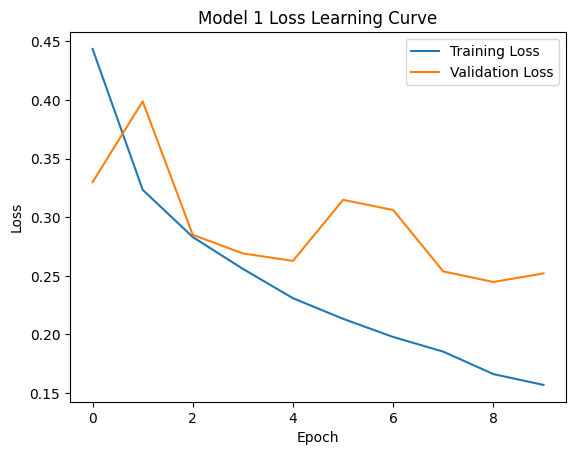

In [ ]:
# Plot Model 1 Loss learning curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1 Loss Learning Curve')
plt.legend()
plt.show()


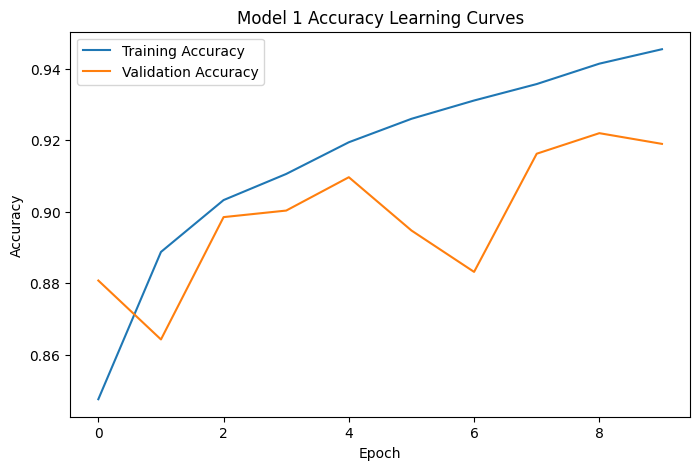

In [ ]:
# Plot learning curves for Model 1 - Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Evaluation**

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall


# Get model predictions
predictions = cnn_model.predict(test_images)

# Convert predictions to one-hot encoded labels
predicted_labels = tf.argmax(predictions, axis=1)



313/313 [==============================] - 7s 23ms/step


In [ ]:

# Get the index of the max logit which represents the predicted class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.93      0.79      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.71      0.81      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



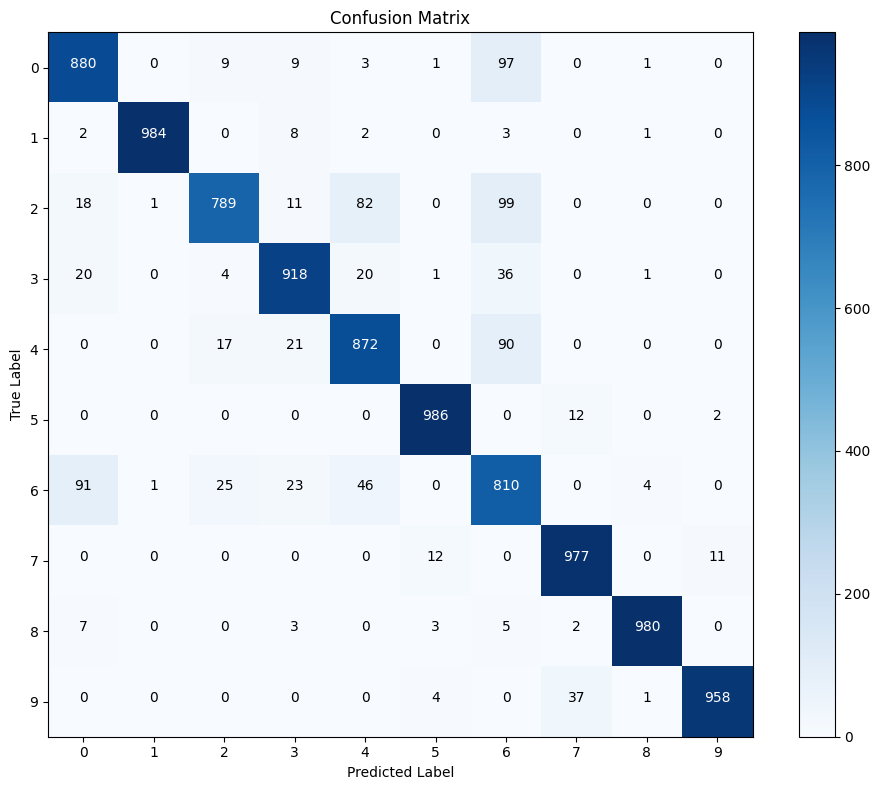

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10), [str(i) for i in range(10)])
plt.yticks(np.arange(10), [str(i) for i in range(10)])

threshold = cm.max() / 2  # for text color contrast

# Loop over the dimensions of the confusion matrix and add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color=color)

plt.tight_layout()
plt.show()


# **Prediction Examples**

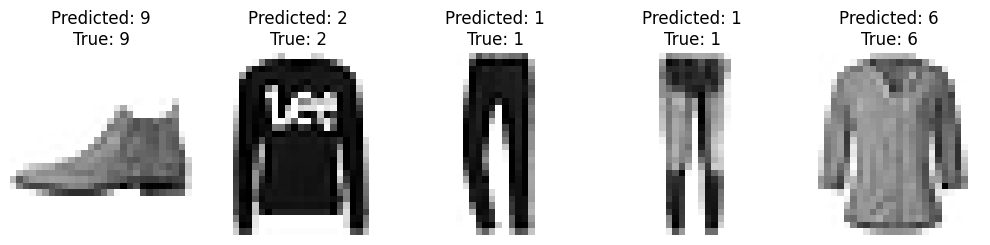

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Display the first 5 test images and their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted: {predicted_classes[i]}\nTrue: {true_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **# b) Apply grid search on the CNN model**

# **Define Hyperparameters**

In [ ]:
activation_functions = ['relu']
optimizers = {'adam': Adam, 'adagrad': Adagrad}
batch_sizes = [4, 8, 16, 32]
learning_rates = [0.001, 0.0001]

# **Define the CNN model as a function**

In [ ]:
# Define the CNN model structure before the loop
def create_cnn_model(activation):
    cnn_model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth convolutional layer
    Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # First fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Second fully connected layer
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
    ])
    return cnn_model


# **Implementing Grid Search on the CNN model**

In [ ]:
# Initialize a list to store the results
results = []
# Hyperparameter grid search
for activation in activation_functions:
    for opt_name, opt_class in optimizers.items():
        for batch_size in batch_sizes:
            for lr in learning_rates:
                print(f"Training with activation: {activation}, optimizer: {opt_name}, batch size: {batch_size}, learning rate: {lr}")
                # Create a new model instance for each combination
                cnn_model_1 = create_cnn_model(activation)

                # Compile the model with the current set of hyperparameters
                optimizer = opt_class(learning_rate=lr)
                cnn_model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

                # Fit the model with validation
                cnn_model_1.fit(train_images, train_labels, batch_size=batch_size, epochs=5, validation_split=0.2)

                # Evaluate the model
                test_loss, test_accuracy = cnn_model_1.evaluate(test_images, test_labels)
                results.append(((activation, opt_name, batch_size, lr), test_accuracy))
                print(f"Test accuracy for activation: {activation}, optimizer: {opt_name}, batch size: {batch_size}, learning rate: {lr}: {test_accuracy}")

# Find the best hyperparameters
best_hyperparams, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best hyperparameters: Activation: {best_hyperparams[0]}, Optimizer: {best_hyperparams[1]}, Batch size: {best_hyperparams[2]}, Learning rate: {best_hyperparams[3]}, with accuracy: {best_accuracy}")


Training with activation: relu, optimizer: adam, batch size: 4, learning rate: 0.001
Epoch 1/5
12000/12000 [==============================] - 86s 7ms/step - loss: 0.6234 - accuracy: 0.7919 - val_loss: 0.4088 - val_accuracy: 0.8577
Epoch 2/5
12000/12000 [==============================] - 87s 7ms/step - loss: 0.4182 - accuracy: 0.8602 - val_loss: 0.3279 - val_accuracy: 0.8833
Epoch 3/5
12000/12000 [==============================] - 88s 7ms/step - loss: 0.3625 - accuracy: 0.8802 - val_loss: 0.3584 - val_accuracy: 0.8646
Epoch 4/5
12000/12000 [==============================] - 87s 7ms/step - loss: 0.3271 - accuracy: 0.8905 - val_loss: 0.3997 - val_accuracy: 0.8544
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.9029
Test accuracy for activation: relu, optimizer: adam, batch size: 4, learning rate: 0.001: 0.902899980545044
Training with activation: relu, optimizer: adam, batch size: 4, learning rate: 0.0001
Epoch 1/5
12000/12000 [===============

# **c) Data Augmentation**

# **Define 5 Data Augmentation Techniques**

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing



data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),  # Flips the image horizontally.
  preprocessing.RandomRotation(0.1),  # Randomly rotates the image by up to 10% of 360 degrees.
  preprocessing.RandomZoom(0.05),  # Randomly zooms the image by up to 5%.
  preprocessing.RandomTranslation(height_factor=0.05, width_factor=0.05),  # Randomly translates the image by up to 5% vertically and horizontally.
  preprocessing.RandomContrast(0.05),  # Randomly adjusts the contrast of the image by up to 5%.
])


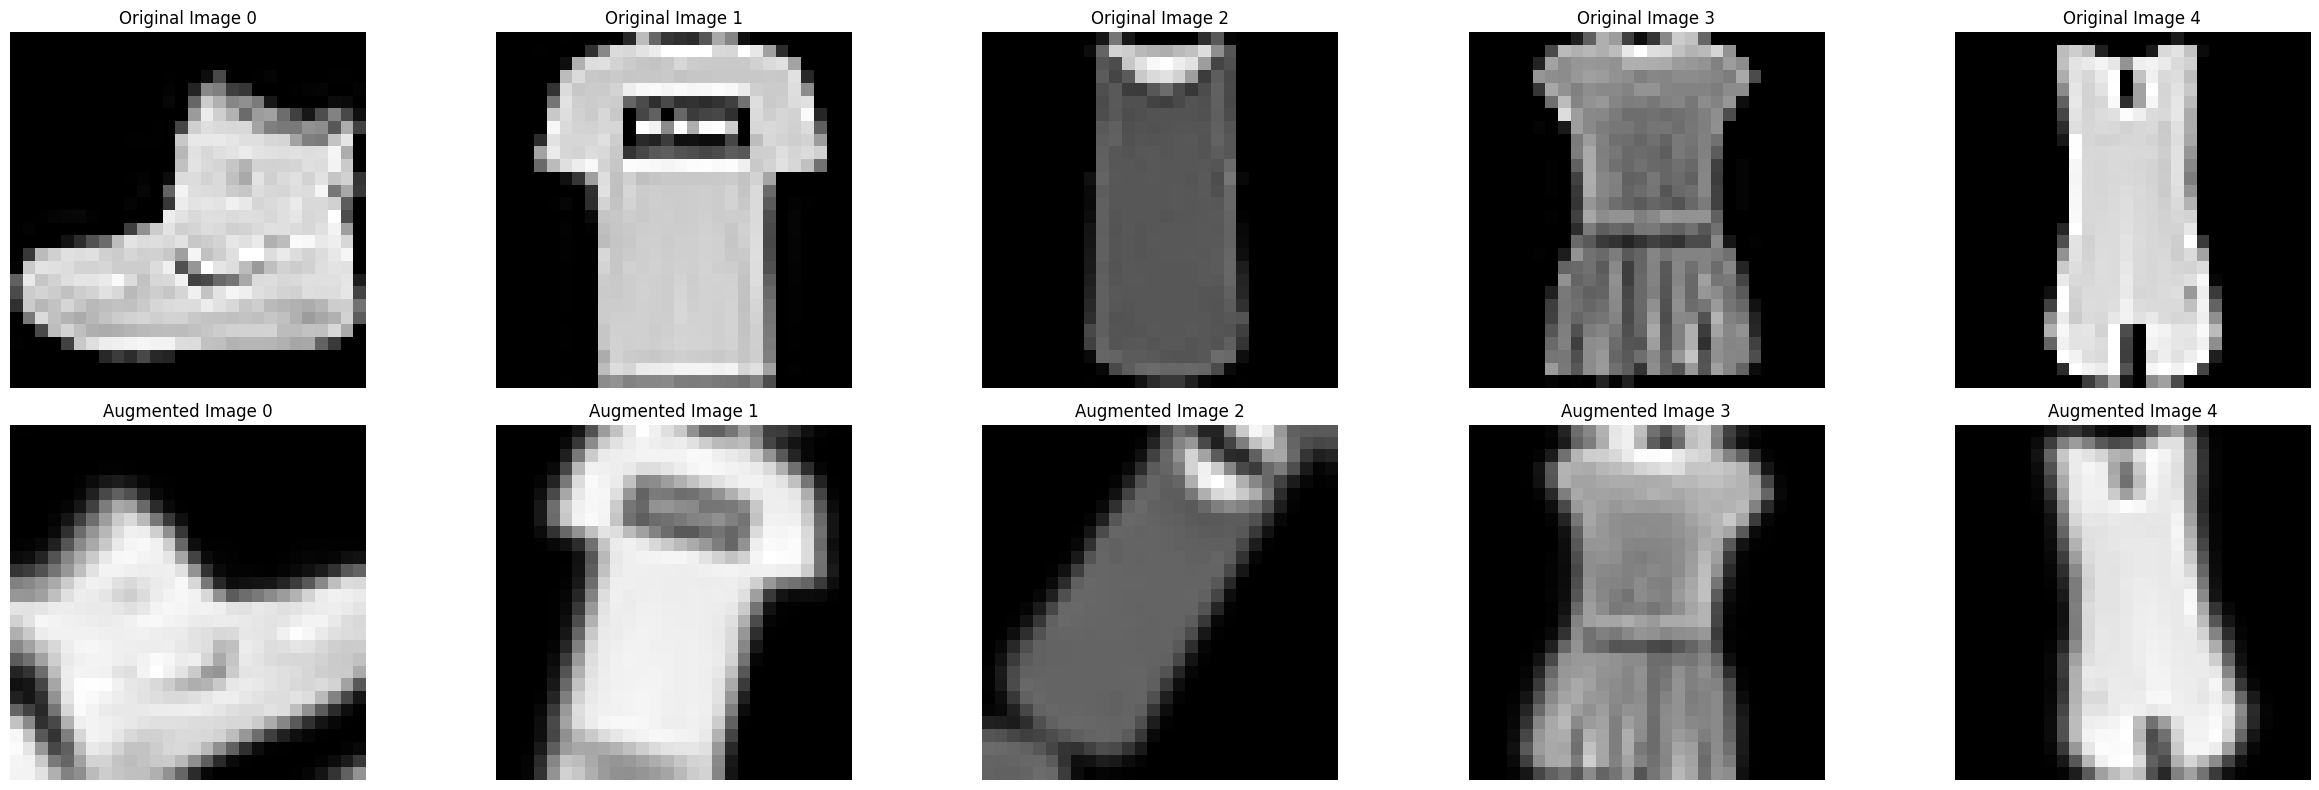

In [ ]:

# Adding a channel dimension to the images
x_train_images = x_train_images[..., None]  # From (60000, 28, 28) to (60000, 28, 28, 1)

# Display some examples of the original and augmented images
fig, ax = plt.subplots(2, 5, figsize=(25, 8))
for i in range(5):
    # Original image
    ax[0, i].imshow(x_train_images[i].squeeze(), cmap='gray')
    ax[0, i].set_title(f'Original Image {i}')
    ax[0, i].axis('off')

    # Augmented image
    augmented_image = data_augmentation(tf.expand_dims(x_train_images[i], 0))
    ax[1, i].imshow(augmented_image[0].numpy().squeeze(), cmap='gray')
    ax[1, i].set_title(f'Augmented Image {i}')
    ax[1, i].axis('off')

plt.tight_layout()
plt.show()


# **Integrate the data augmentation with CNN model created in part a**

# **Model Building**

In [ ]:
# Define the CNN model
cnn_model_2= Sequential([
    data_augmentation,
    # First convolutional layer
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth convolutional layer
    Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # First fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Second fully connected layer
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])


In [ ]:
cnn_model_2.build(input_shape=(None, 28, 28, 1))
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 64)       

# **Compile Model**

In [ ]:
cnn_model_2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# **Train Model**

In [ ]:
batch_size = 32
epochs = 10
# Train the model
history_1 = cnn_model_2.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 8ms/step - loss: 0.7741 - accuracy: 0.7173 - val_loss: 0.5745 - val_accuracy: 0.7732
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5491 - accuracy: 0.8055 - val_loss: 0.5145 - val_accuracy: 0.8138
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4844 - accuracy: 0.8286 - val_loss: 0.4221 - val_accuracy: 0.8382
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4448 - accuracy: 0.8427 - val_loss: 0.4070 - val_accuracy: 0.8561
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4184 - accuracy: 0.8496 - val_loss: 0.3716 - val_accuracy: 0.8645
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4111 - accuracy: 0.8524 - val_loss: 0.3711 - val_accuracy: 0.8682
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3934 - accuracy: 0.8593 - val_loss: 0.3980 - val_ac

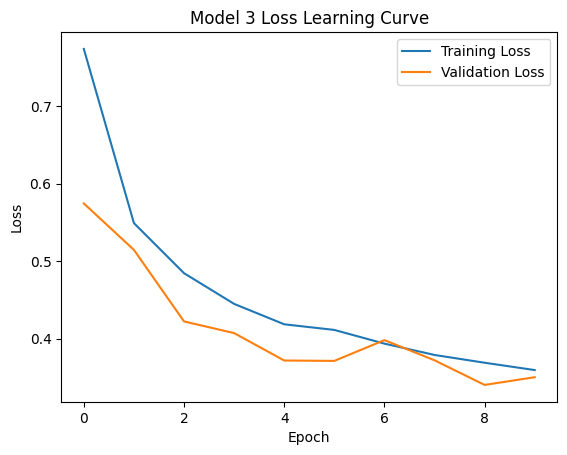

In [ ]:
# Plot Model 3 Loss learning curves
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 3 Loss Learning Curve')
plt.legend()
plt.show()


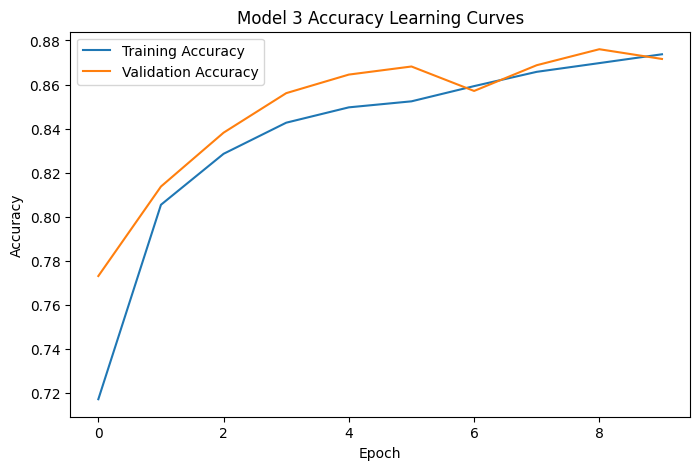

In [ ]:
# Plot learning curves for Model 3 - Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Evaluate the model**

In [ ]:
# Get model predictions
predictions_1 = cnn_model_2.predict(test_images)

# Convert predictions to one-hot encoded labels if they aren't already
predicted_labels = tf.argmax(predictions_1, axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Get the index of the max logit which represents the predicted class
predicted_classes = np.argmax(predictions_1, axis=1)
true_classes = np.argmax(test_labels, axis=1)
# Generate a classification report
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.88      0.71      0.79      1000
           3       0.93      0.79      0.85      1000
           4       0.72      0.85      0.78      1000
           5       0.98      0.94      0.96      1000
           6       0.55      0.68      0.61      1000
           7       0.90      0.97      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



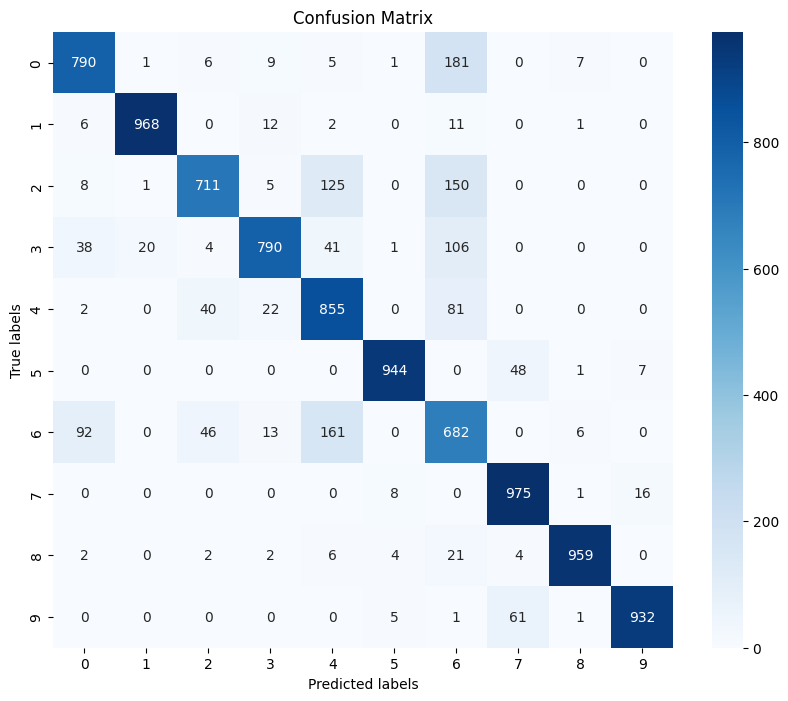

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Prediction Examples**

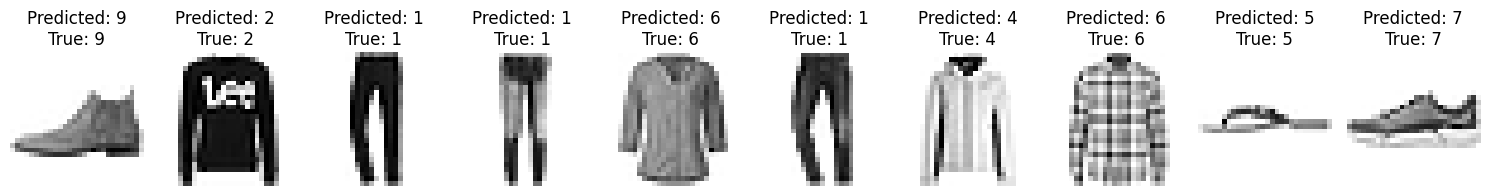

In [ ]:

# Display the first 5 test images and their predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted: {predicted_classes[i]}\nTrue: {true_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## **d)** **Transfer Learning**

# **Preprocessing for Transfer Learning**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Resizing images
print("Before preprocessing:")
print("Train images shape:", x_train_images.shape)
print("Test images shape:",x_test_images.shape)

# Ensure the images have a 4D shape (batch_size, height, width, channels)
train_images_expanded = np.expand_dims(x_train_images, axis=-1)
test_images_expanded = np.expand_dims(x_test_images, axis=-1)

# Resize the images to 32x32 pixels and convert them to 3 channels
train_images_resized = tf.image.resize(train_images_expanded, [32, 32]).numpy()
train_images_resized = np.repeat(train_images_resized, 3, axis=-1)
test_images_resized = tf.image.resize(test_images_expanded, [32, 32]).numpy()
test_images_resized = np.repeat(test_images_resized, 3, axis=-1)

print("After resizing:")
print("Train images shape:", train_images_resized.shape)
print("Test images shape:", test_images_resized.shape)


print("Before normalization:")

#  check the minimum and maximum values of the normalized data to ensure they are within the expected range [0, 1]
print("Training set - Min:", train_images_resized.min(), "Max:", train_images_resized.max())
print("Test set - Min:", test_images_resized.min(), "Max:", test_images_resized.max())
# Normalize the images
train_images_resized = train_images_resized / 255.0
test_images_resized = test_images_resized / 255.0

print("After normalization:")

#  check the minimum and maximum values of the normalized data to ensure they are within the expected range [0, 1]
print("Normalized training set - Min:", train_images_resized.min(), "Max:", train_images_resized.max())
print("Normalized test set - Min:", test_images_resized.min(), "Max:", test_images_resized.max())

print("Before:")
print("First training label:", y_train_labels[0])  # Print the label of the first training image
print("Seventh test label:", y_test_labels[7]) # Print the label of the seventh test image

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(y_train_labels, 10)
test_labels_one_hot = to_categorical(y_test_labels, 10)

print("After one-hot encoding:")
print("First training label (one-hot):", train_labels_one_hot[0])  # Print the one-hot encoded label of the first training image
print("Seventh test label (one-hot):", test_labels_one_hot[7])  # Print the one-hot encoded label of the seventh test image


Before preprocessing:
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
After resizing:
Train images shape: (60000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
Before normalization:
Training set - Min: 0.0 Max: 255.0
Test set - Min: 0.0 Max: 255.0
After normalization:
Normalized training set - Min: 0.0 Max: 1.0
Normalized test set - Min: 0.0 Max: 1.0
Before:
First training label: 9
Seventh test label: 6
After one-hot encoding:
First training label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Seventh test label (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# Addional layers
vgg_model = Sequential([
    base_model,  # Add the VGG16 base model
    GlobalAveragePooling2D(),  # Add global average pooling layer
    Dense(1024, activation='relu'),  # Add a fully connected layer with 1024 units and ReLU activation
    Dense(10, activation='softmax')  # Add the final output layer with 10 units for classification
])

# Compile the model
vgg_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
vgg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 15250250 (58.18 MB)
Trainable params: 535562 (2.04 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [4]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
batch_size = 32
epochs = 10
# Train the model
history_4 = vgg_model.fit(train_images_resized, train_labels_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 692s 461ms/step - loss: 0.5131 - accuracy: 0.8140 - val_loss: 0.4858 - val_accuracy: 0.8186
Epoch 2/10
1500/1500 [==============================] - 667s 445ms/step - loss: 0.3982 - accuracy: 0.8527 - val_loss: 0.4125 - val_accuracy: 0.8445
Epoch 3/10
1500/1500 [==============================] - 645s 430ms/step - loss: 0.3616 - accuracy: 0.8652 - val_loss: 0.3718 - val_accuracy: 0.8621
Epoch 4/10
1500/1500 [==============================] - 663s 442ms/step - loss: 0.3349 - accuracy: 0.8744 - val_loss: 0.3879 - val_accuracy: 0.8563
Epoch 5/10
1500/1500 [==============================] - 661s 441ms/step - loss: 0.3140 - accuracy: 0.8817 - val_loss: 0.3604 - val_accuracy: 0.8702
Epoch 6/10
1500/1500 [==============================] - 669s 446ms/step - loss: 0.2978 - accuracy: 0.8868 - val_loss: 0.3626 - val_accuracy: 0.8686
Epoch 7/10
1500/1500 [==============================] - 661s 441ms/step - loss: 0.2807 - accuracy: 0.8942 - val_

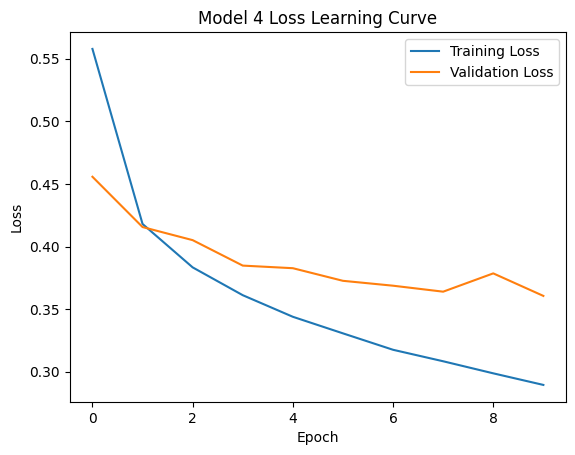

In [ ]:
# Plot Model 4 Loss learning curves
train_loss = history_4.history['loss']
val_loss = history_4.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 4 Loss Learning Curve')
plt.legend()
plt.show()


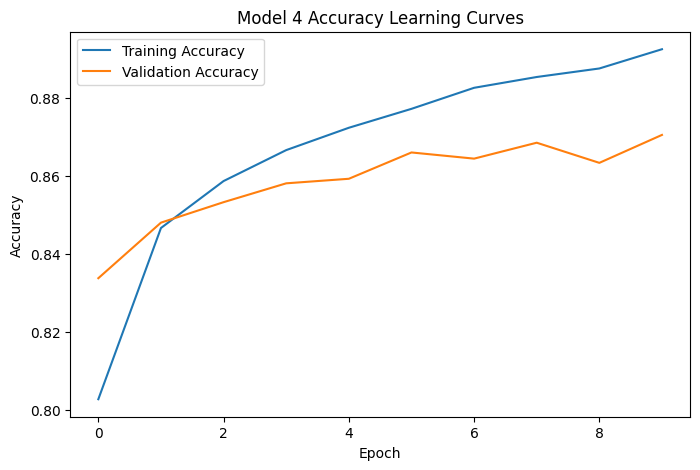

In [ ]:
# Plot learning curves for Model 4 - Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4 Accuracy Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Evaluation of Transfer Learning**

313/313 [==============================] - 3s 9ms/step - loss: 0.3745 - accuracy: 0.8696
Test loss: 0.37453436851501465, Test accuracy: 0.8695999979972839


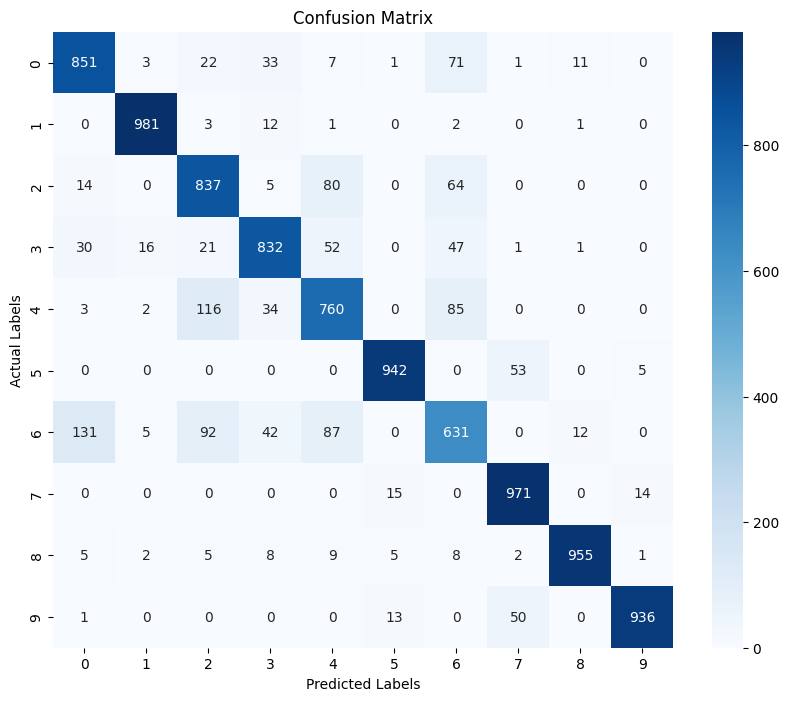

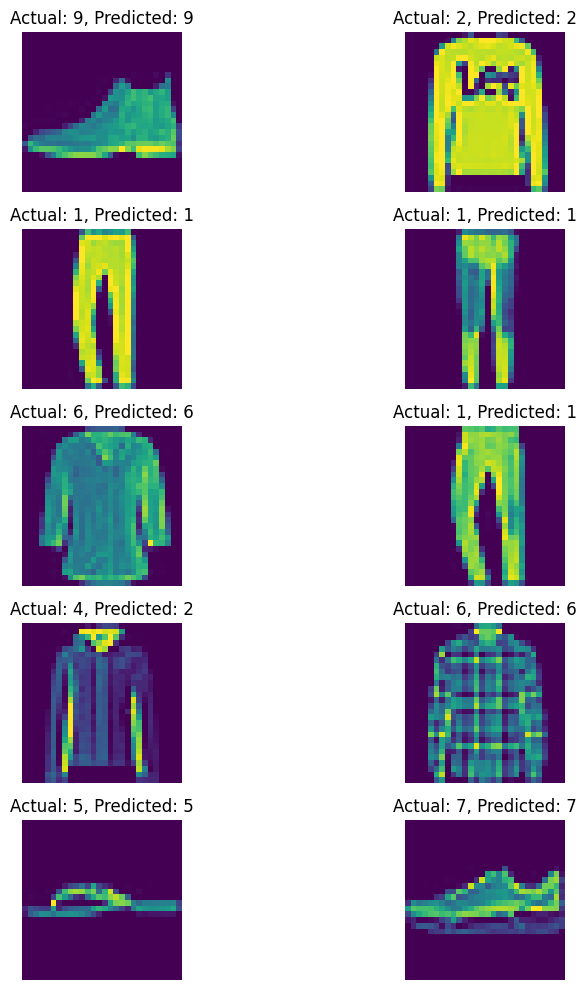

In [ ]:
# Make predictions with the model
predictions = vgg_model.predict(test_images_resized)
predicted_classes = np.argmax(predictions, axis=1)

# Evaluate the model
loss, accuracy = vgg_model.evaluate(test_images_resized, test_labels_one_hot)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Show some prediction examples
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Actual: {test_labels[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()